Task1

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

In [4]:
df = pd.read_csv('Student_Perf.csv')

In [5]:
print(df.head())

   Unnamed: 0  school  sex  age  address  famsize  Pstatus  Medu  Fedu  \
0           0     0.0  0.0   18      1.0      0.0      0.0   4.0   4.0   
1           1     0.0  0.0   17      1.0      0.0      1.0   1.0   1.0   
2           2     0.0  0.0   15      1.0      1.0      1.0   1.0   1.0   
3           3     0.0  0.0   15      1.0      0.0      1.0   4.0   2.0   
4           4     0.0  0.0   16      1.0      0.0      1.0   3.0   3.0   

   reason  ...  internet  romantic  famrel  freetime  goout  Dalc  Walc  \
0     0.0  ...       0.0       0.0     3.0       2.0    3.0   0.0   0.0   
1     0.0  ...       1.0       0.0     4.0       2.0    2.0   0.0   0.0   
2     2.0  ...       1.0       0.0     3.0       2.0    1.0   1.0   2.0   
3     1.0  ...       1.0       1.0     2.0       1.0    1.0   0.0   0.0   
4     1.0  ...       0.0       0.0     3.0       2.0    1.0   0.0   1.0   

   health  absences  outcome  
0     2.0       4.0      Low  
1     2.0       2.0      Low  
2     2.0  

school  sex  age  address  famsize  Pstatus  Medu  Fedu reason internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences are the features,
while outcome is the target

In [6]:
X = df.drop(['Unnamed: 0', 'outcome'], axis=1)  # Drop the 'Unnamed: 0' index column and 'outcome' target column
y = df['outcome']  # 'outcome' is the target variable

In [7]:
# Baseline Models
# Decision Tree without regularization (with Cross-Validation)
dt_model = DecisionTreeClassifier(random_state=42)
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
accuracy_dt = dt_cv_scores.mean()
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.5994036970781156


In [8]:
# Logistic Regression without regularization (with Cross-Validation)
lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
accuracy_lr = lr_cv_scores.mean()
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.6655098389982111


Now lets regularize them and improve the accuracy, let's start with the decisione tree and choosing max_depth as the parameter to work on.

In [9]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 12, 15, None], #parameter selected is max_depth

}
grid_search_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='accuracy'
)

grid_search_dt.fit(X, y)
best_dt_model = grid_search_dt.best_estimator_

print("Best Hyperparameters:", grid_search_dt.best_params_)

Best Hyperparameters: {'max_depth': 7}


In [14]:
# Evaluate the tuned Decision Tree using cross-validation
dt_tuned_cv_scores = cross_val_score(best_dt_model, X, y, cv=5, scoring='accuracy')
accuracy_dt_tuned = dt_tuned_cv_scores.mean()
print("Tuned Decision Tree Accuracy:", accuracy_dt_tuned)

Tuned Decision Tree Accuracy: 0.6209660107334527


HUGE IMPROVEMENTS!
Now let's work on the Logistic Regression using L1 regularization

In [27]:
param_grid_lr = {
    'C': [0.5, 0.7, 1, 1.2, 1.5, 2],
    'penalty': ['l1'],  # L1 regularization
    'solver': ['liblinear', 'saga']  # Try different solvers
}

grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=2000),  # Increase max_iter
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all available CPU cores for faster processing
)

grid_search_lr.fit(X, y)
best_lr_model = grid_search_lr.best_estimator_

print("Best Hyperparameters:", grid_search_lr.best_params_)

Best Hyperparameters: {'C': 1.5, 'penalty': 'l1', 'solver': 'saga'}


In [28]:
# Evaluate the tuned Logistic Regression using cross-validation
lr_tuned_cv_scores = cross_val_score(best_lr_model, X, y, cv=5, scoring='accuracy')
accuracy_lr_tuned = lr_tuned_cv_scores.mean()
print("Tuned Logistic Regression Accuracy:", accuracy_lr_tuned)

Tuned Logistic Regression Accuracy: 0.6716636851520572


IMPROVEMENT!
Now lets plot the results and the chart

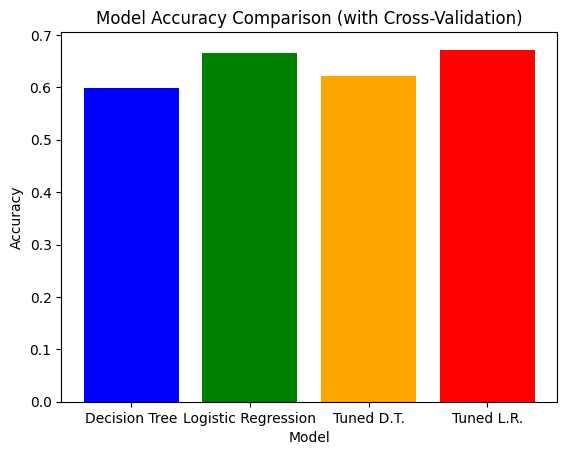

Decision Tree Acc. (Baseline) with CV: 0.5994036970781156
Logistic Regression Acc. (Baseline) with CV: 0.6655098389982111
Tuned Decision Tree Acc. with CV: 0.6209660107334527
Tuned Logistic Regression Acc. with CV: 0.6716636851520572


In [29]:

# Prepare data for plotting
models = ['Decision Tree', 'Logistic Regression', 'Tuned D.T.', 'Tuned L.R.']
accuracies = [accuracy_dt, accuracy_lr, accuracy_dt_tuned, accuracy_lr_tuned]

# Create bar chart
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (with Cross-Validation)')
plt.show()

# Print out the accuracy results
print(f"Decision Tree Acc. (Baseline) with CV: {accuracy_dt}")
print(f"Logistic Regression Acc. (Baseline) with CV: {accuracy_lr}")
print(f"Tuned Decision Tree Acc. with CV: {accuracy_dt_tuned}")
print(f"Tuned Logistic Regression Acc. with CV: {accuracy_lr_tuned}")


As we can see, after the implementation of the tuning using GridSearch to find the best hyperparameter value, we had a noticible improvement in the accurary, tests are done in a cross-validation framework

Task2

In the Tuned Decision Tree, regularization is achieved by controlling the hyperparameter max_depth. this force the tree to grow smaller and use fewer features. Once the model is trained, we can examine the feature importance to see which features were most important in making splits.

In [35]:

# Get feature importances from the tuned decision tree model
importances = best_dt_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display features that have importance > 0 (selected features)
selected_features_dt = feature_importance_df[feature_importance_df['Importance'] > 0]

# Display the features that were not selected (Importance = 0)
not_selected_features_dt = feature_importance_df[feature_importance_df['Importance'] == 0]

print("Selected Features for Tuned Decision Tree:")
print(selected_features_dt)

print("\nNot Selected Features for Tuned Decision Tree:")
print(not_selected_features_dt)

Selected Features for Tuned Decision Tree:
       Feature  Importance
12    failures    0.220681
18      higher    0.098005
11   studytime    0.068200
27    absences    0.065453
14      famsup    0.058410
25        Walc    0.053734
26      health    0.051358
13   schoolsup    0.050372
1          sex    0.045031
2          age    0.042972
6         Medu    0.042522
7         Fedu    0.038374
0       school    0.035118
22    freetime    0.033173
10  traveltime    0.021622
20    romantic    0.017674
8       reason    0.017196
24        Dalc    0.014503
16  activities    0.013256
21      famrel    0.012344

Not Selected Features for Tuned Decision Tree:
     Feature  Importance
19  internet         0.0
17   nursery         0.0
15      paid         0.0
23     goout         0.0
3    address         0.0
4    famsize         0.0
9   guardian         0.0
5    Pstatus         0.0


features with high importance values are considered selected, while features with zero importance were not used in the tree.


Let's look at the coefficients of the Logistic Regression with L1 regularization model. Features with non-zero coefficients are considered selected, and those with zero coefficients are excluded.

In [34]:

coefficients = best_lr_model.coef_.flatten()
features = X.columns
feature_coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
selected_features_lr = feature_coeff_df[feature_coeff_df['Coefficient'] != 0]
not_selected_features_lr = feature_coeff_df[feature_coeff_df['Coefficient'] == 0]

# Print out the selected and not selected features
print("Selected Features for Logistic Regression (L1 Regularization):")
print(selected_features_lr)

print("\nNot Selected Features for Logistic Regression (L1 Regularization):")
print(not_selected_features_lr)


Selected Features for Logistic Regression (L1 Regularization):
       Feature  Coefficient
0       school     0.703370
1          sex     0.516112
2          age    -0.133738
3      address    -0.409309
4      famsize     0.221165
5      Pstatus     0.361236
6         Medu    -0.179990
7         Fedu    -0.164206
8       reason    -0.022452
9     guardian     0.104745
10  traveltime    -0.031791
11   studytime    -0.246174
12    failures     1.627921
13   schoolsup     1.130514
14      famsup     0.104650
15        paid     0.309291
16  activities    -0.148175
17     nursery    -0.071311
18      higher    -1.862221
19    internet    -0.240343
20    romantic     0.153740
21      famrel    -0.132077
22    freetime     0.054588
23       goout     0.087674
24        Dalc     0.314554
25        Walc     0.047245
26      health     0.190371
27    absences     0.081800

Not Selected Features for Logistic Regression (L1 Regularization):
Empty DataFrame
Columns: [Feature, Coefficient]
Index: []

Features like school, sex, failures, schoolsup, studytime, and paid have relatively higher coefficients, therefore they have a strong influence on the model's predictions.

Some features with negative coefficients (address, age, higher, internet, etc.) suggest they negatively influence the probability of the class (outcome)

No features were excluded by the L1 regularization, that means that all features were considereduseful in the model.


Comment:

Are the selections stable (consistent across
different runs)?

Since no features were excluded, this model appears stable in terms of regularization, as it uses all features, but with varying levels of importance

The Decision Tree stability is more dependands to the chosen hyperparameters( max_depth in this case), because Decision Trees can exhibit randomness in their tree construction, but through cross-validation and Tuning the stability of feature selection is improved.

In Conclusion both models show a degree of stability in selecting important features. However, the Decision Tree might show slight variations across runs due to its random nature.

Is there agreement between the logistic regression and
decision tree models?

There is some agreement between the models on important features ( ex. failures, higher, studytime). However, the models also disagree on which features to prioritize, for example Logistic Regression includes all features and the Decision Tree ignoring some features entirely, working thus with a smaller subset of features.